In [97]:
from typing import Generator
from glob import iglob
from itertools import chain

from h5py import File
import numpy as np
import matplotlib.pyplot as plt
from cytoolz import partition
from scipy.fftpack import fft, fftshift

In [17]:
globbed = iglob("/data/Test/Run_003/rawdata/*.h5")


def read_spectrum(filename: str) -> Generator[np.ndarray, None, None]:
    with File(filename, "r") as f:
        x0 = 500
        x1 = f["/photon_diagnostics/Spectrometer/Wavelength"][...]
        a = (
            f["/photon_diagnostics/Spectrometer/WavelengthSpan"][...]
            * f["/photon_diagnostics/Spectrometer/Pixel2micron"][...]
            / 1000
        )
        arr = f["/photon_diagnostics/Spectrometer/hor_spectrum"][...]
        _, n = arr.shape
        x = a * (np.arange(n) - x0) + x1
        for y in arr:
            yield x, y


spectra = chain.from_iterable(read_spectrum(fn) for fn in globbed)

In [7]:
f.attrs

<Attributes of HDF5 object at 140266119530192>

In [31]:
globbed = iglob("/data/Test/Run_003/rawdata/*.h5")


def read_spectrum(filename: str) -> Generator[np.ndarray, None, None]:
    with File(filename, "r") as f:
        for arr in f["/photon_diagnostics/Spectrometer/hor_spectrum"]:
            yield arr


spectra = chain.from_iterable(read_spectrum(fn) for fn in globbed)

In [32]:
arr = np.stack(np.average(arr, 0) for arr in partition(1, spectra))

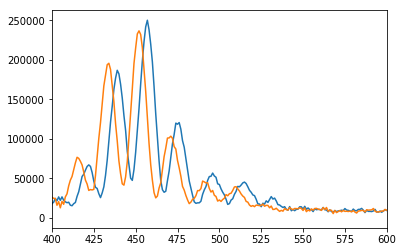

In [75]:
# spec.shape
# plt.plot(1/np.arange(n), arr[100])
# plt.xlim(0, 0.01)
i = 4354
plt.plot(arr[i])
i = 7000
plt.plot(arr[i])
plt.xlim(400, 600)
plt.show()

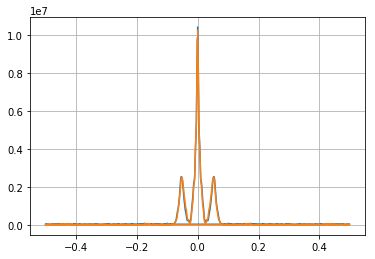

In [101]:
k = len(arr[i])
t = fftfreq(k)

i = 4354
plt.plot(t, np.abs(fft(arr[i])))
# plt.plot(t, np.angle(fft(arr[i])))

i = 7000
plt.plot(t, np.abs(fft(arr[i])))
# plt.plot(t, np.angle(fft(arr[i])))

# plt.twinx()
# plt.xlim(400, 600)
# plt.xlim(-0.05, 0.05)
plt.grid()
plt.show()

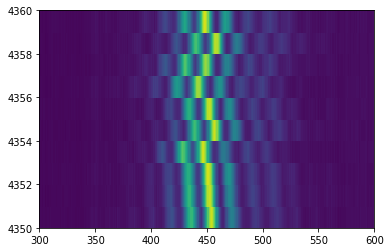

In [67]:
plt.pcolormesh(arr)
plt.xlim(300, 600)
plt.ylim(4350, 4360)
plt.show()

In [ ]:
def f(phi, sigma, k0, amp):